# **CDT - 40**

## **Sinais complexos**

In [59]:
g = lambda t: np.exp(-t)*np.exp(1j*2*10/3*np.pi*t)

In [60]:
t1 = np.linspace(0, 3, 900)
signal = g(t1)

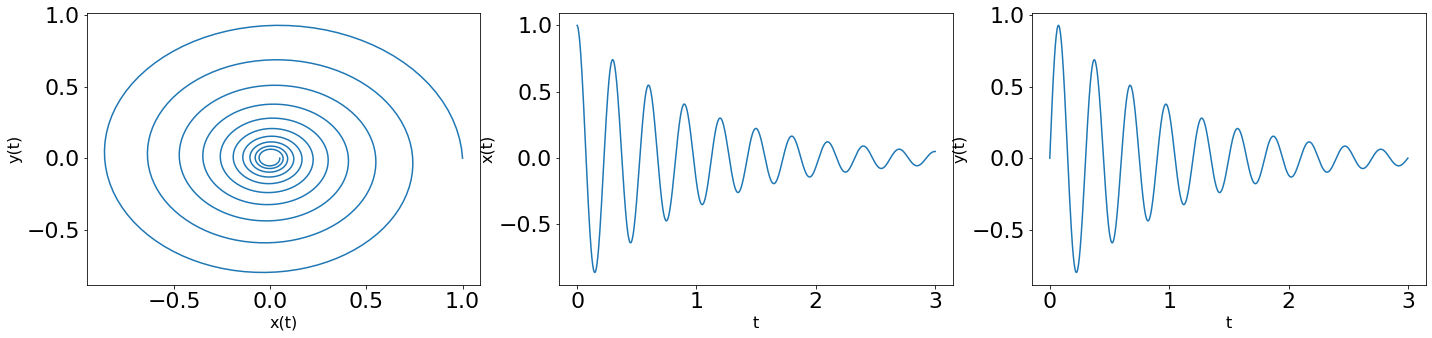

In [61]:
fig, axis = plt.subplots(1,3,figsize = (24, 5))

plt.sca(axis[0])

plt.xlabel('x(t)', fontsize = 16)
plt.ylabel('y(t)', fontsize = 16)

plt.plot(np.real(signal), np.imag(signal))

plt.sca(axis[1])

plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)

plt.plot(t1, np.real(signal))

plt.sca(axis[2])

plt.xlabel('t', fontsize = 16)
plt.ylabel('y(t)', fontsize = 16)

plt.plot(t1, np.imag(signal))

## **Transformada de Hilbert e sinais analíticos**

In [62]:
def A(t):
    
    if 0 <= t:
        if t <= 1/3:
            
            return 1
        
        elif t <= 2/3:
        
            return 3
        
        elif t <= 1:
            
            return 2
        
    return None

In [63]:
def fp(t, f0):
    
    if 0 <= t:
        if t <= 1/3:
            
            return 2*f0
        
        elif t <= 2/3:
        
            return 1/3*f0
        
        elif t <= 1:
            
            return 1*f0
        
    return None

In [64]:
g2 = lambda t: A(t)*np.cos(2*np.pi*fp(t, 10)*t)

In [65]:
gaussian = lambda x, m, s: 1/(np.sqrt(2*np.pi*s**2))*np.exp(-(x - m)**2/(2*s**2))

In [66]:
t2 = np.linspace(0, 1, 300)
s2 =  np.array([g2(ti) for ti in t2])

In [67]:
h2, H2, G2, f2 = hilbert(s2, t2[1] - t2[0])
ga, Ga, _,s2l = analytic(s2, t2[1] - t2[0])

Text(0, 0.5, 'phase(t)')

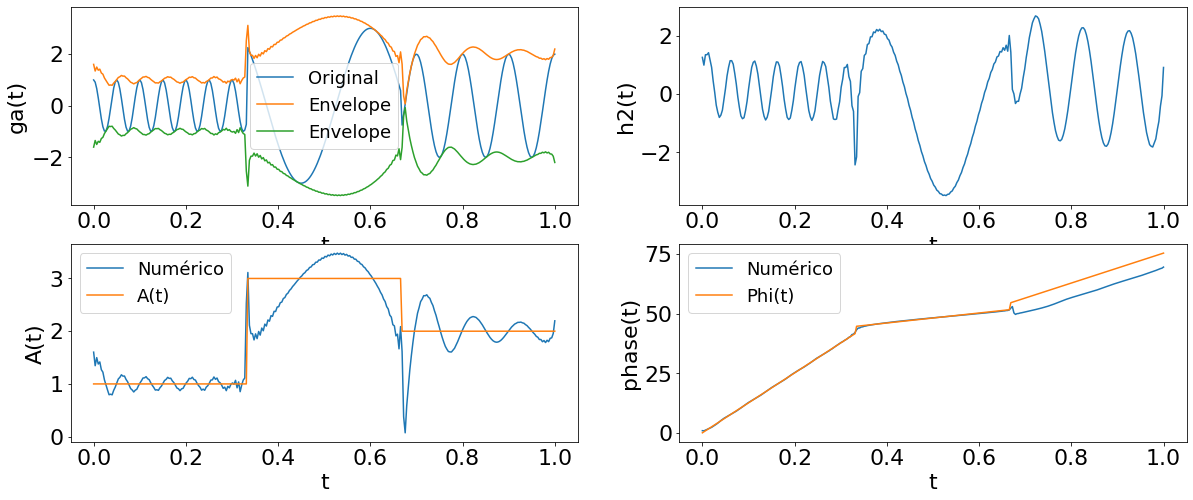

In [68]:
fig, axis = plt.subplots(2,2, figsize=(20,8))

plt.sca(axis[0][0])

plt.plot(t2,s2, label = 'Original')

plt.plot(t2, np.absolute(ga), label = 'Envelope')
plt.plot(t2, -np.absolute(ga), label = 'Envelope')

plt.xlabel('t')
plt.ylabel('ga(t)')
plt.legend()


plt.sca(axis[0][1])

plt.plot(t2, np.real(h2))

plt.xlabel('t')
plt.ylabel('h2(t)')

plt.sca(axis[1][0])

plt.plot(t2, gaussian_filter1d(np.abs(ga), 0.005), label = 'Numérico')
plt.plot(t2, [A(t) for t in t2], label = 'A(t)')

plt.legend()

plt.xlabel('t')
plt.ylabel('A(t)')

plt.sca(axis[1][1])


plt.plot(t2, np.unwrap(np.angle(ga)), label = 'Numérico')
plt.plot(t2, np.unwrap([2*np.pi*fp(t, 10)*t for t in t2]), label = 'Phi(t)')

plt.legend()

plt.xlabel('t')
plt.ylabel('phase(t)')

## **Frequência instantanea**

In [69]:
g3 = lambda t, f0: np.cos(2*np.pi*f0*t)

In [70]:
t3 = np.linspace(0, 1, 300)
s3 = g3(t3, 20)

In [71]:
s3a, S3a, S3, f3 = analytic(s3, t3[1] - t3[0])

In [72]:
phi3 = np.unwrap(np.angle(s3a))
fi3 = (phi3[1:] - phi3[:299])/(t3[1] - t3[0])/2/np.pi

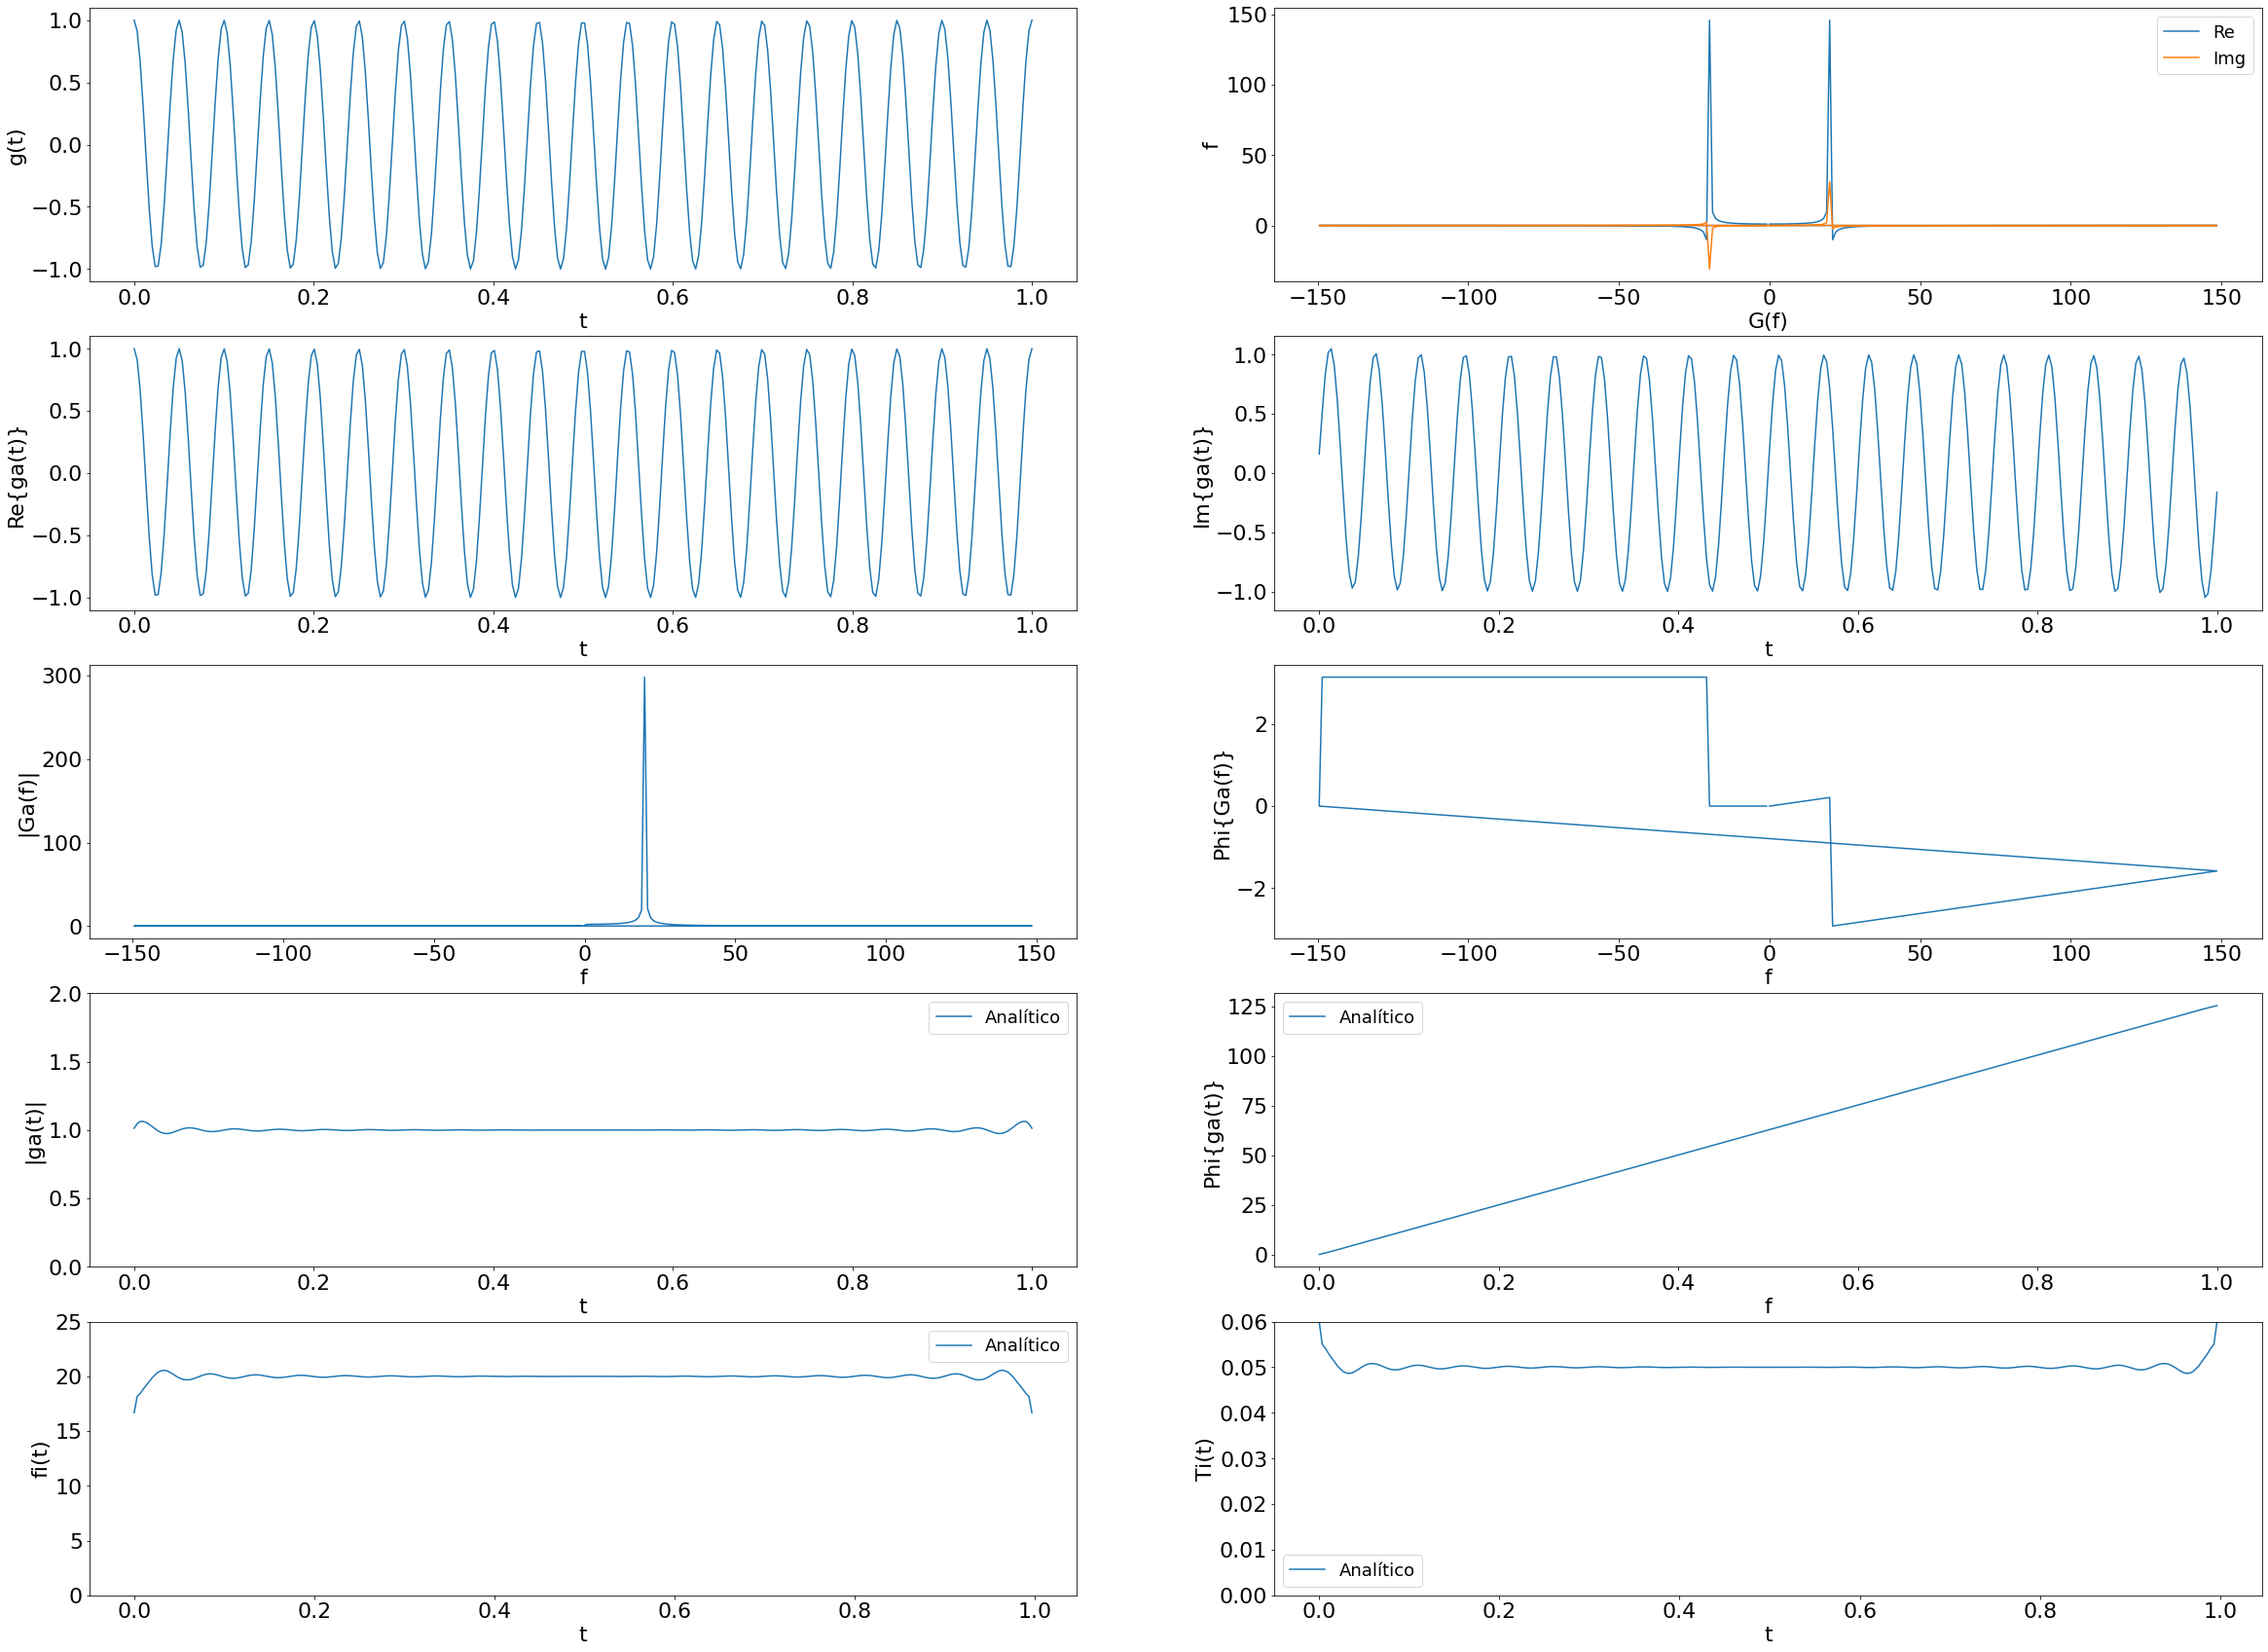

In [73]:
fig, axis = plt.subplots(5, 2, figsize = (40, 30))

plt.sca(axis[0][0])

plt.plot(t3, s3)

plt.xlabel('t')
plt.ylabel('g(t)')


plt.sca(axis[0][1])

plt.plot(f3, np.real(S3), label = 'Re')
plt.plot(f3, np.imag(S3), label = 'Img')

plt.xlabel('G(f)')
plt.ylabel('f')

plt.legend()


plt.sca(axis[1][0])

plt.plot(t3, np.real(s3a))

plt.xlabel('t')
plt.ylabel('Re{ga(t)}')


plt.sca(axis[1][1])

plt.plot(t3, np.imag(s3a))

plt.xlabel('t')
plt.ylabel('Im{ga(t)}')

plt.sca(axis[2][0])

plt.plot(f3, np.abs(S3a))

plt.xlabel('f')
plt.ylabel('|Ga(f)|')


plt.sca(axis[2][1])

plt.plot(f3, np.unwrap(np.angle(S3a)))

plt.xlabel('f')
plt.ylabel('Phi{Ga(f)}')


plt.sca(axis[3][0])

plt.plot(t3, np.abs(gaussian_filter1d(s3a, 0.005)), label = 'Analítico')

plt.ylim((0,2))


plt.xlabel('t')
plt.ylabel('|ga(t)|')

plt.legend()


plt.sca(axis[3][1])

plt.plot(t3, np.unwrap(np.angle(s3a)), label = 'Analítico')

plt.xlabel('f')
plt.ylabel('Phi{ga(t)}')

plt.legend()


plt.sca(axis[4][0])

plt.plot(t3[:299], fi3, label = 'Analítico')

plt.ylim((0,25))

plt.xlabel('t')
plt.ylabel('fi(t)')

plt.legend()


plt.sca(axis[4][1])

plt.plot(t3[:299], 1/fi3, label = 'Analítico')

plt.ylim((0,0.06))

plt.xlabel('t')
plt.ylabel('Ti(t)')

plt.legend()


## **Amplitude e Modulação**

In [74]:
c = lambda t, fc: np.cos(2*np.pi*fc*t)
s = lambda t: np.exp(-2*t)

g4 = lambda t: c(t, 20)*s(t)

In [75]:
t4 = np.linspace(0, 1, 300)
s4 = g4(t4)

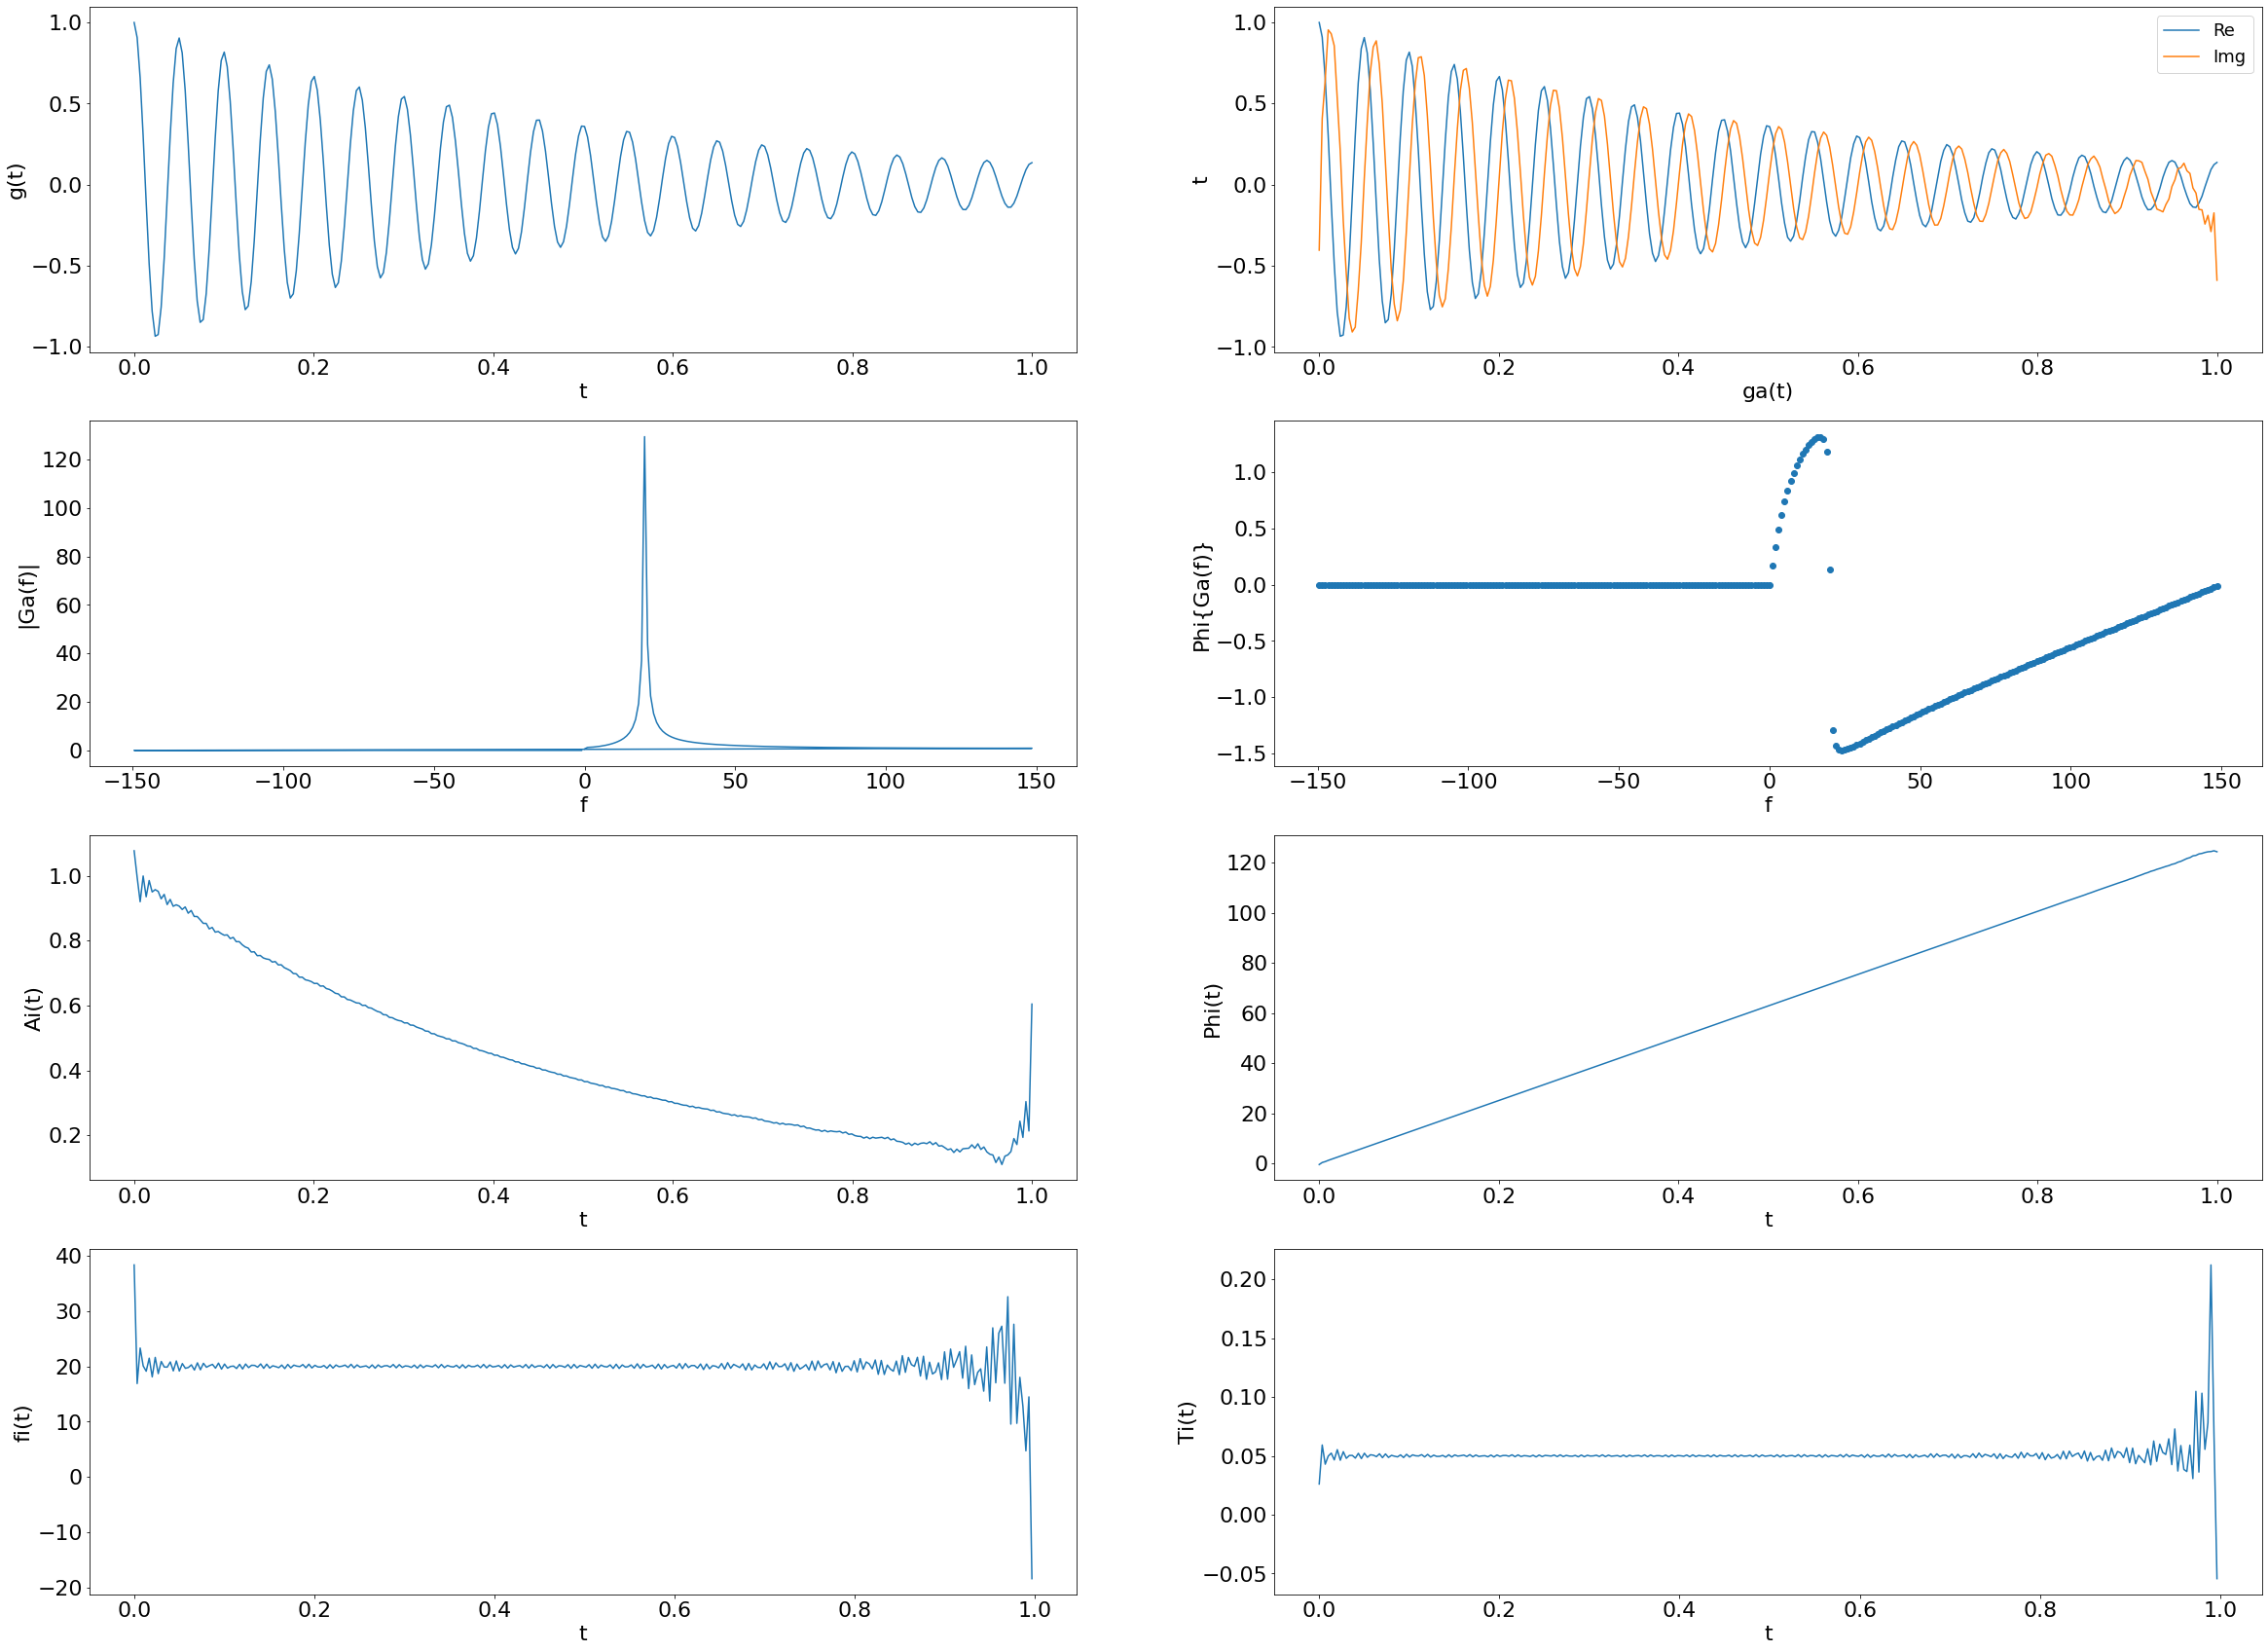

In [76]:
plot_analytic_signal(t4,s4)

## **Sinais Chirp**

In [77]:
a = lambda f1, f2, T: (f2 - f1)/T
g5 = lambda t, f1, f2, T: np.cos(2*np.pi*(a(f1, f2, T)*t**2/2 + f1*t))

In [78]:
f1 = 10
f2 = 100
T = 1

In [79]:
t5 = np.linspace(0, 1, 300)
s5 = g5(t5, f1, f2, T)

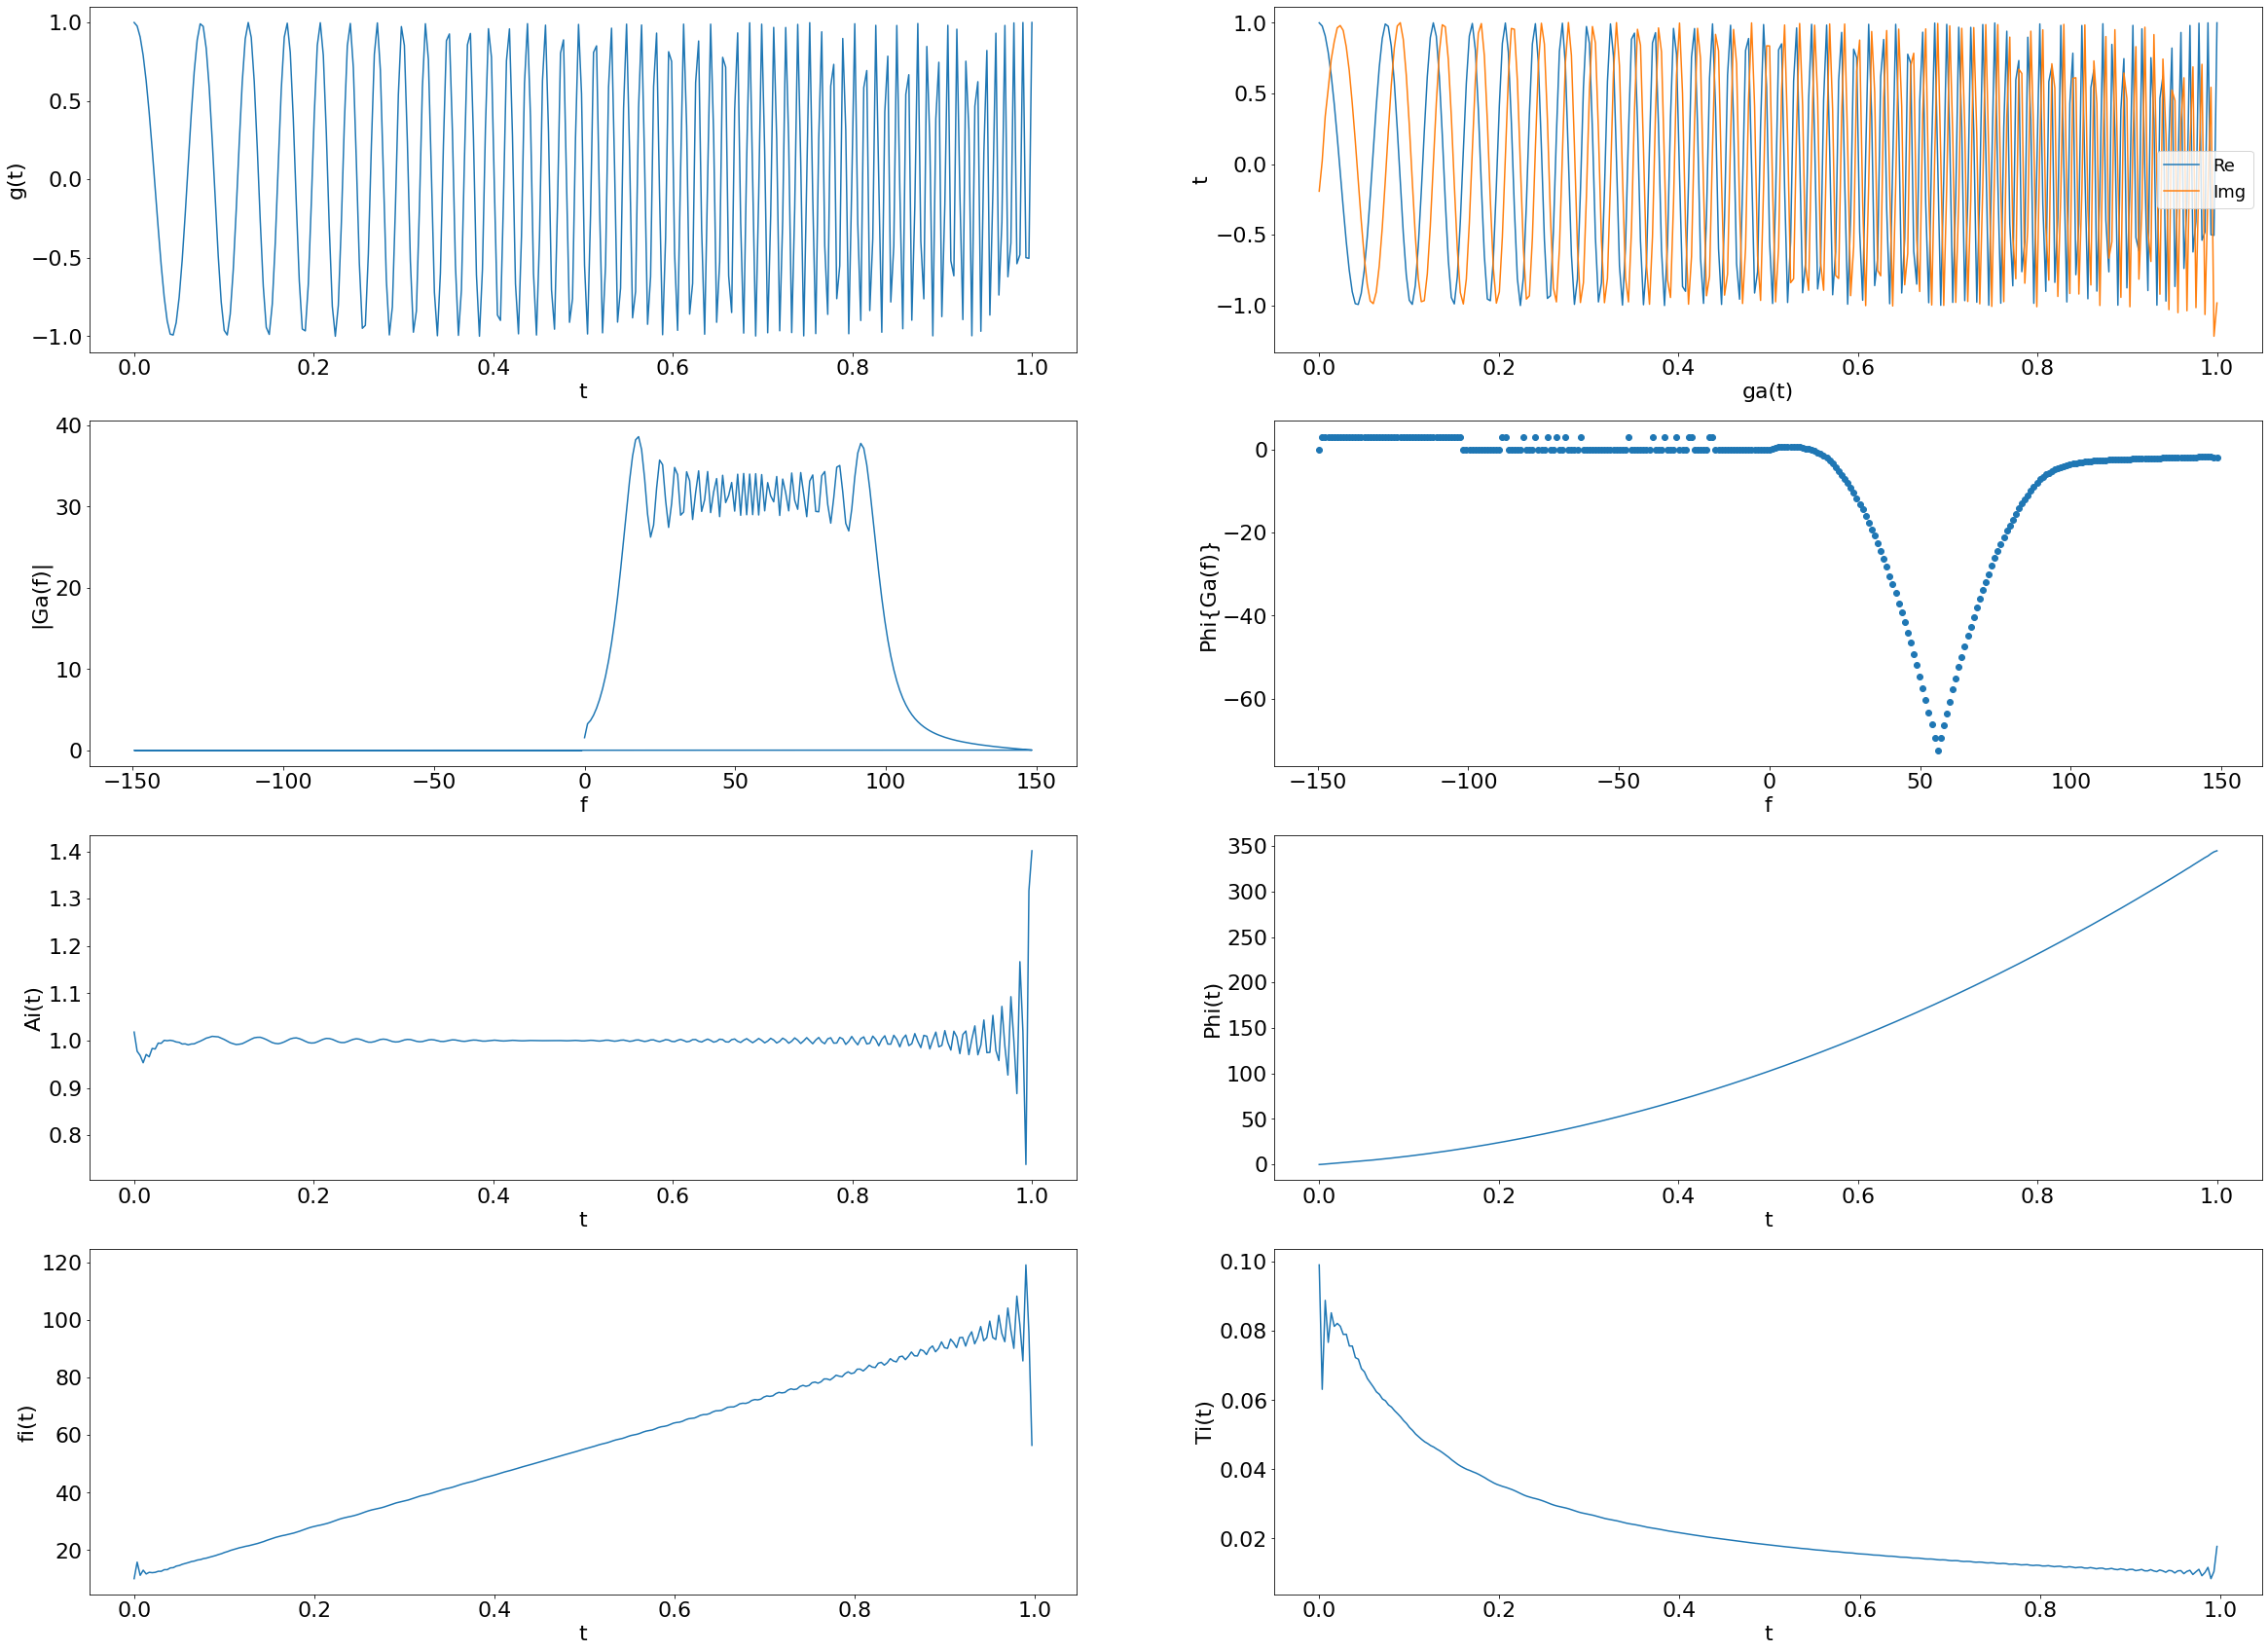

In [80]:
plot_analytic_signal(t5, s5)

## **Modulação de Frequências**

In [81]:
g6 = lambda t, fc: np.cos(2*np.pi*fc*t + 5*np.sin(2*np.pi*4*t))

In [82]:
fc = 40

In [83]:
t6 = np.linspace(0, 1, 300)
s6 = g6(t6, fc)

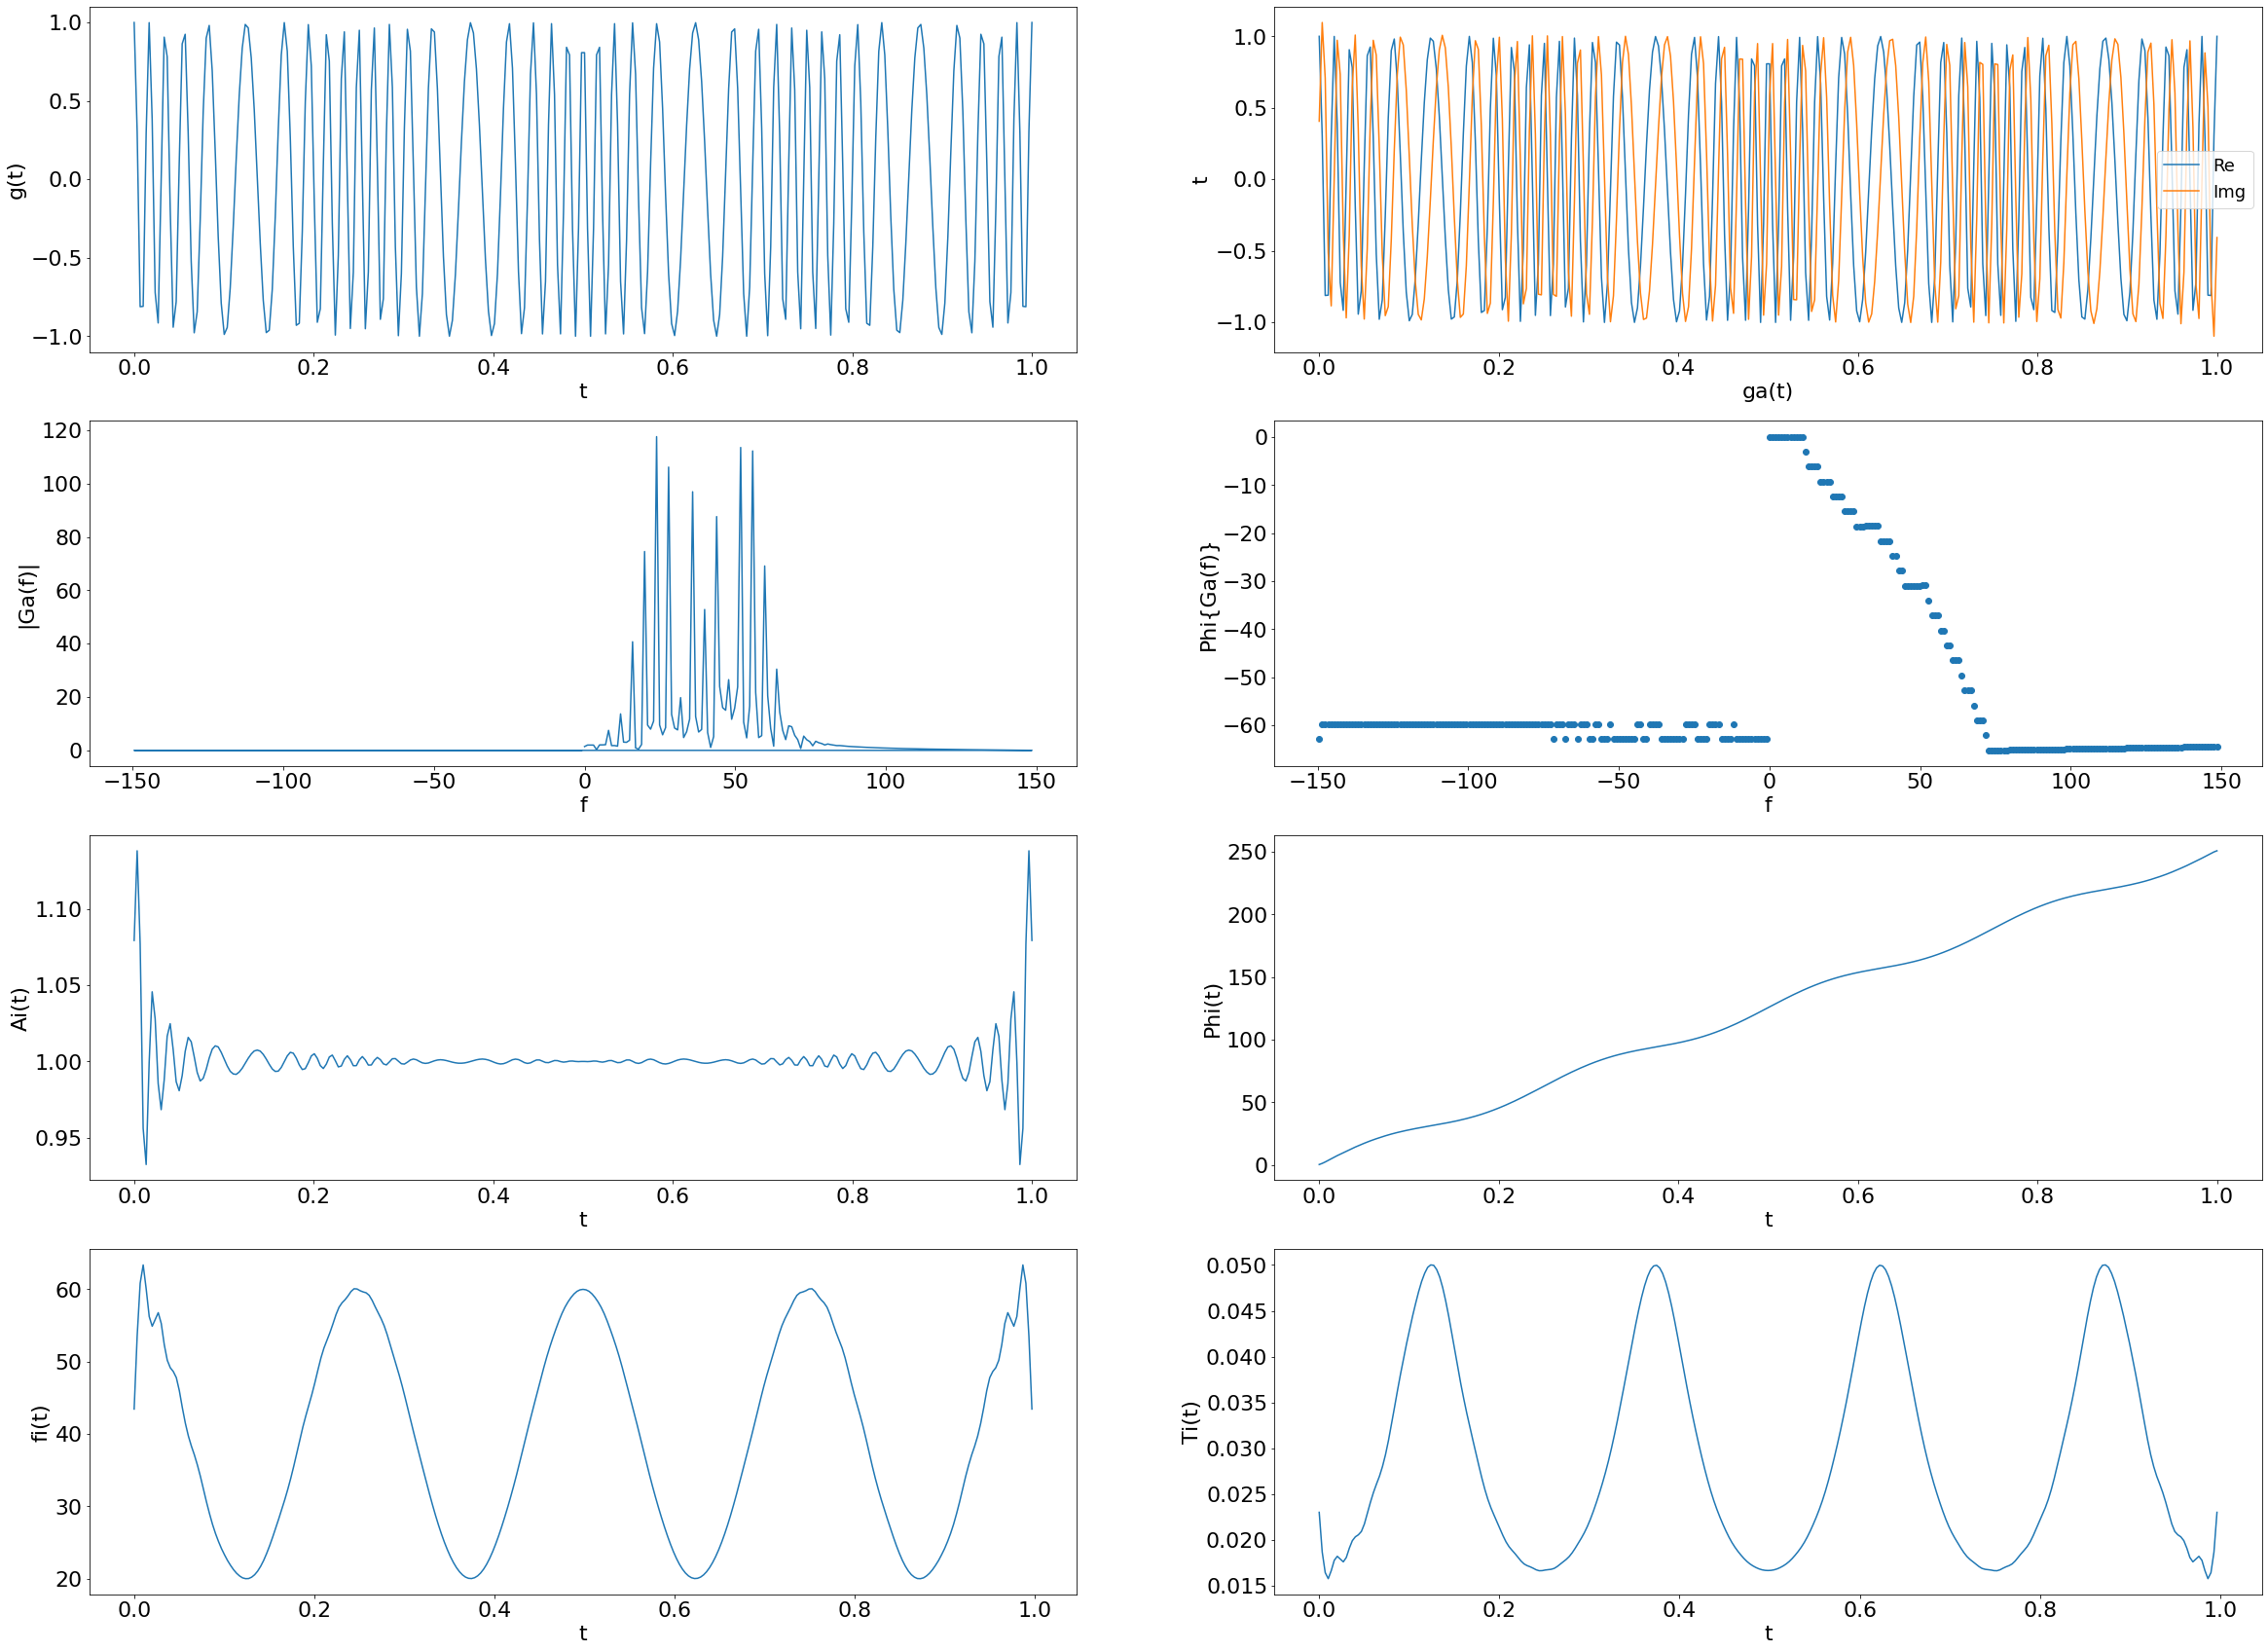

In [84]:
plot_analytic_signal(t6, s6)

## **Modulações Combinadas**

In [85]:
g6 = lambda t, fc: np.exp(-2*t)*np.cos(2*np.pi*fc*t + 5*np.sin(2*np.pi*4*t))

In [86]:
fc = 40

In [87]:
t6 = np.linspace(0, 1, 300)
s6 = g6(t6, fc)

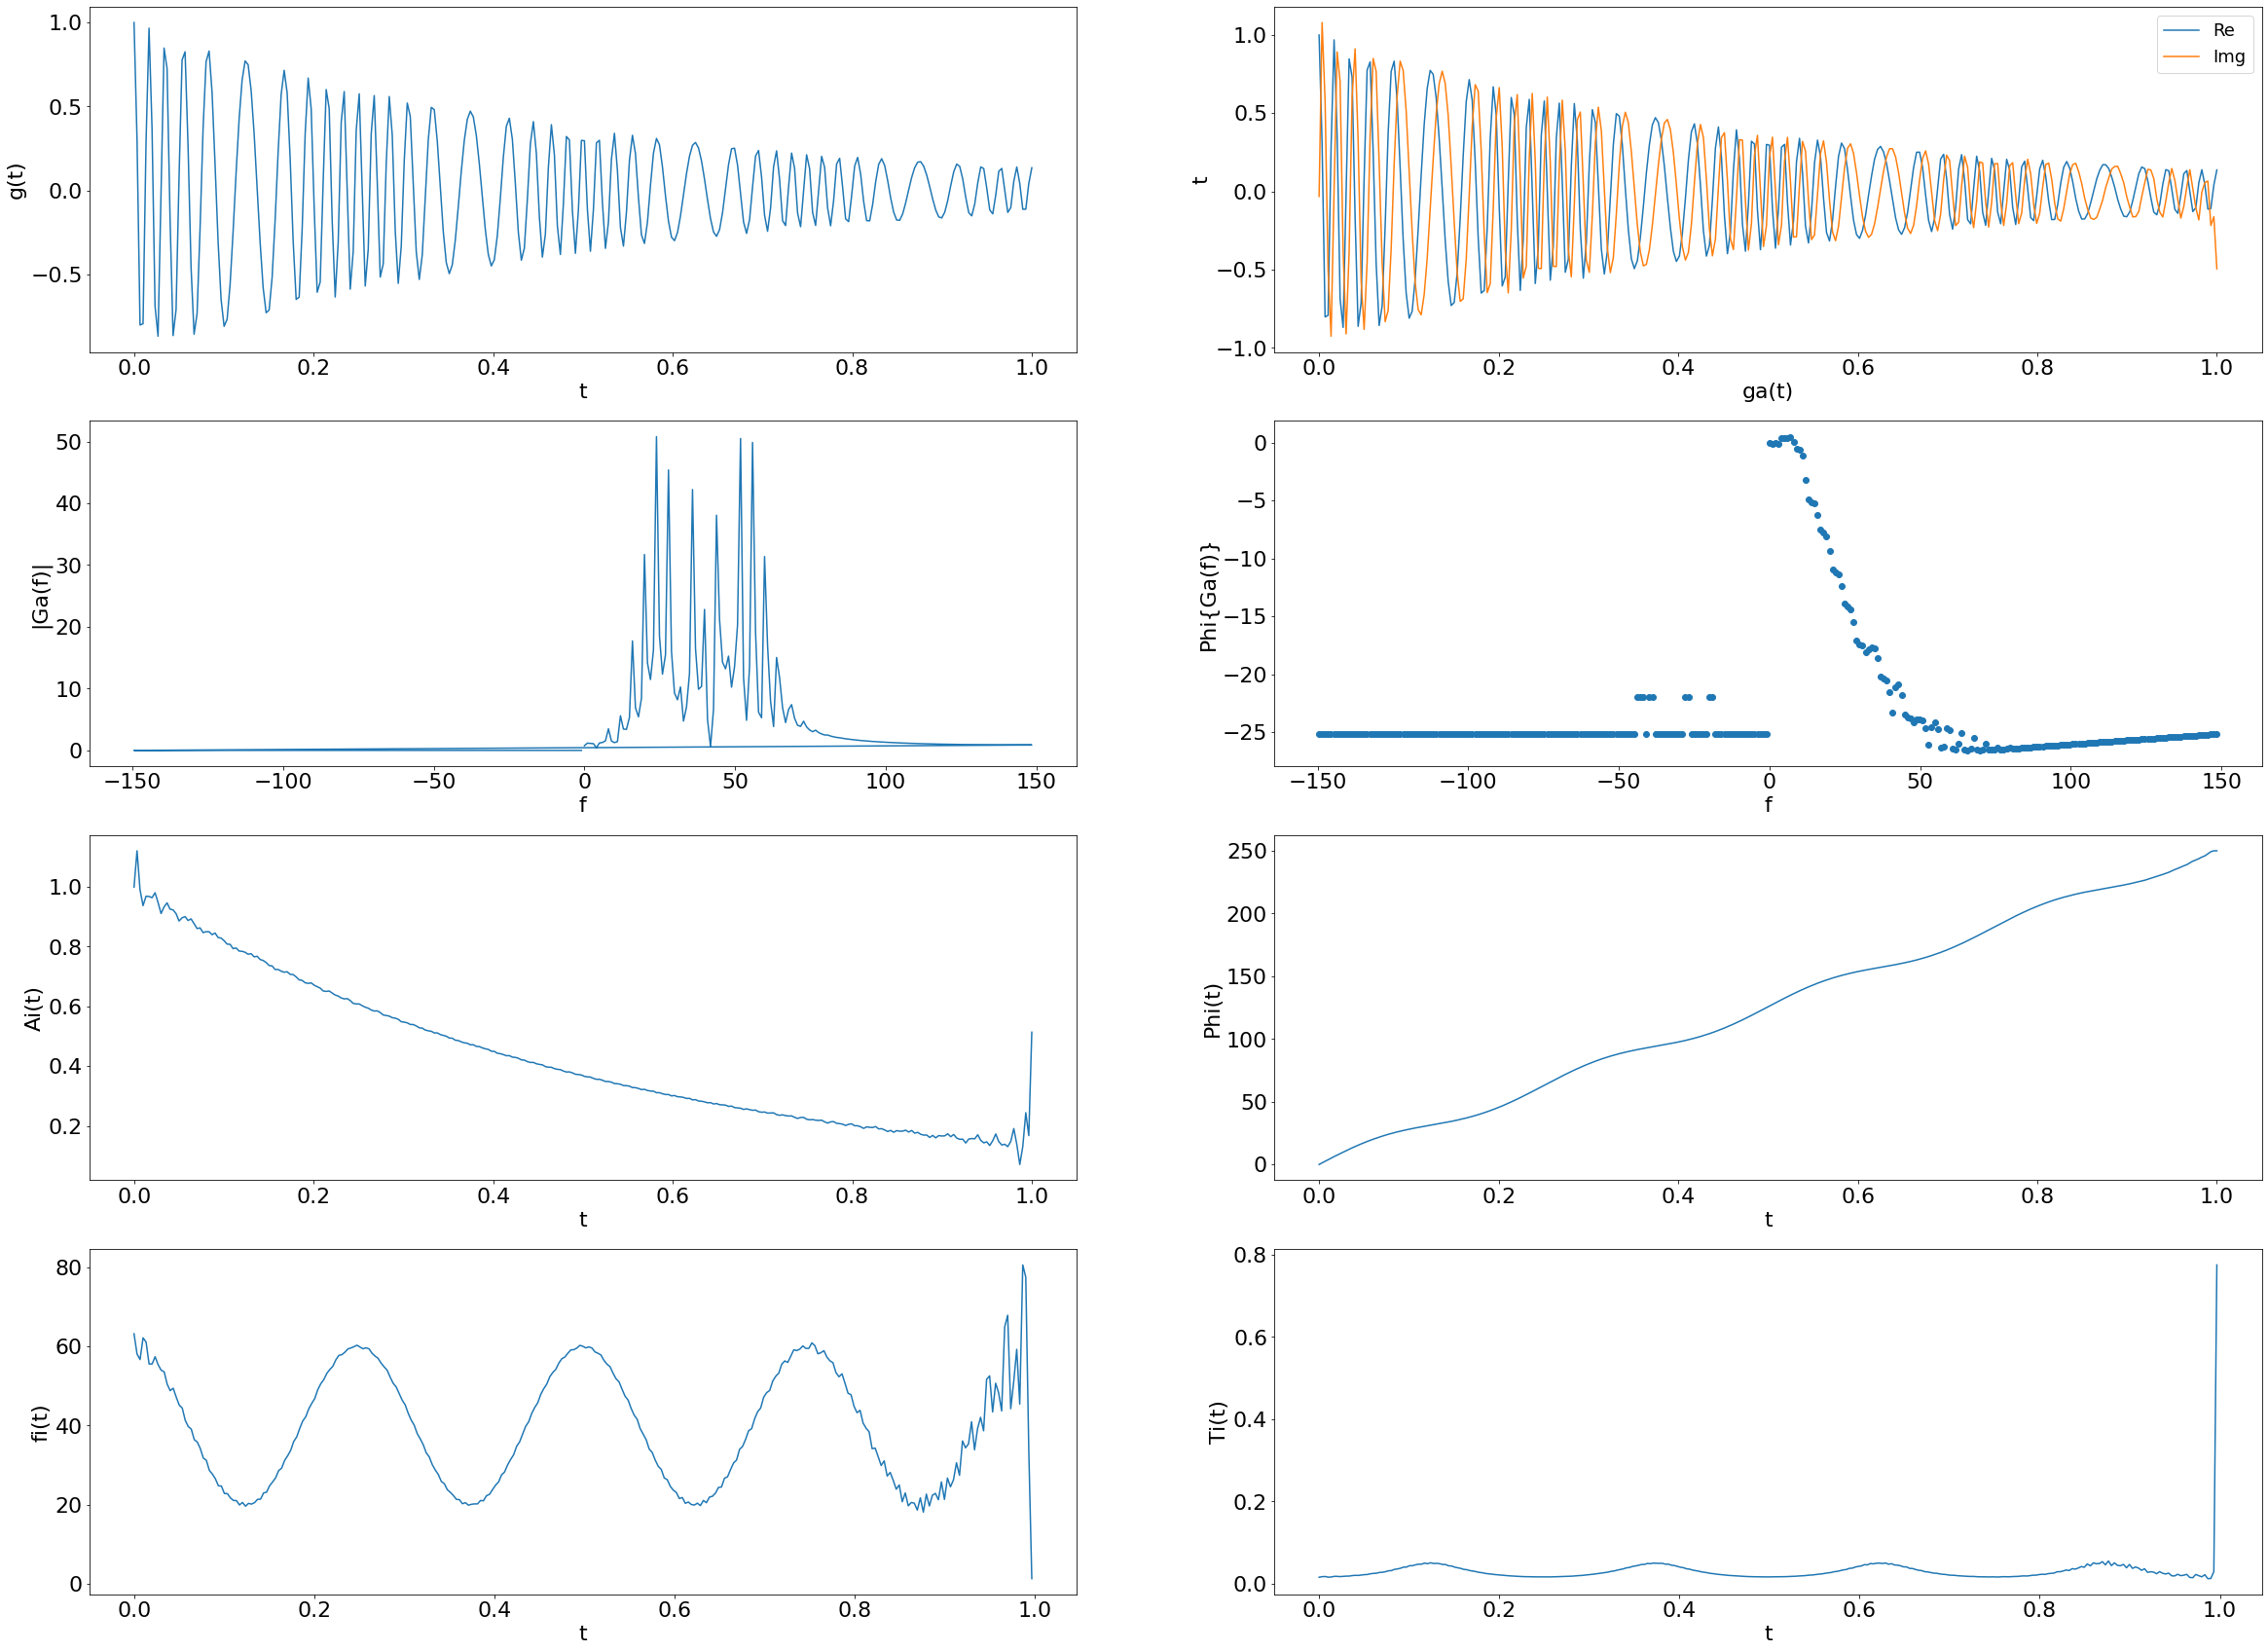

In [88]:
plot_analytic_signal(t6, s6)

## **Bibliotecas**

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import signal
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft, ifft, fftfreq

## **Configurações**

In [4]:
%matplotlib inline

In [41]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

## **Funções**

In [20]:
def plot_analytic_signal(t, s, ft = False, sigma = 6, r = False):
    
    ga, Ga, G, f = analytic(s, t[1] - t[0])
    
    Ga_phi = np.unwrap(np.angle(Ga))
    Ga_A = np.abs(Ga)
    
    ga_phi = np.unwrap(np.angle(ga))
    ga_fi = (ga_phi[1:] - ga_phi[:299])/(t[1] - t[0])/2/np.pi
    
    ga_A = np.abs(ga)
    ga_Ti = 1/ga_fi
    
    # filtros nas amplitudes
    if ft:
        
        ga_A = gaussian_filter1d(ga_A, sigma)
        Ga_A = gaussian_filter1d(Ga_A, sigma)
    
    
    fig, axis = plt.subplots(4, 2, figsize = (40, 30))

    
    plt.sca(axis[0][0])

    plt.plot(t, s)

    plt.xlabel('t')
    plt.ylabel('g(t)')

    
    plt.sca(axis[0][1])

    plt.plot(t, np.real(ga), label = 'Re')
    plt.plot(t, np.imag(ga), label = 'Img')

    plt.xlabel('ga(t)')
    plt.ylabel('t')

    plt.legend()

    
    plt.sca(axis[1][0])

    plt.plot(f, Ga_A)

    plt.xlabel('f')
    plt.ylabel('|Ga(f)|')


    plt.sca(axis[1][1])

    plt.plot(f, Ga_phi, 'o')

    plt.xlabel('f')
    plt.ylabel('Phi{Ga(f)}')

    
    plt.sca(axis[2][0])

    plt.plot(t, ga_A)

    plt.xlabel('t')
    plt.ylabel('Ai(t)')


    plt.sca(axis[2][1])

    plt.plot(t, ga_phi)

    plt.xlabel('t')
    plt.ylabel('Phi(t)')

    
    plt.sca(axis[3][0])

    plt.plot(t[:299], ga_fi )

    plt.xlabel('t')
    plt.ylabel('fi(t)')


    plt.sca(axis[3][1])

    plt.plot(t[:299], ga_Ti)

    plt.xlabel('t')
    plt.ylabel('Ti(t)')
    
    
    if r:
        return ga, Ga, G, f, Ga_phi, Ga_A, ga_phi, ga_fi, ga_A, ga_Ti

In [7]:
def sng(t):
    
    s = np.ones_like(t)
    
    s[t < 0] = -1
    s[t == 0] = 0
    
    return s

In [8]:
def hilbert(s, timestep):
    
    X = np.fft.fft(s)
    f = np.fft.fftfreq(s.size, timestep)
    
    H = -1j*X*sng(f)
    h = np.fft.ifft(H)
    
    return h, H, X, f

In [9]:
def h(f):
    
    hs = np.ones_like(f, dtype = float)
    
    hs[f < 0] = 0 
    hs[f == 0] = 1/2
    
    return hs

In [10]:
def analytic(signal, timestep):
    
    s = signal
    
    G = fft(s)
    f = fftfreq(s.size, timestep)

    Ga = 2*G*h(f)
    ga = ifft(Ga)
    
    return ga, Ga, G, f